In [2]:
import pandas as pd

data = pd.read_csv('Advertising.csv')
print(data.head())
print(data.describe())
print(data.info())


      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   s

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
#from google.colab import drive

#drive.mount('/content/drive')
#data = pd.read_csv('/content/drive/My Drive/advertising.csv')


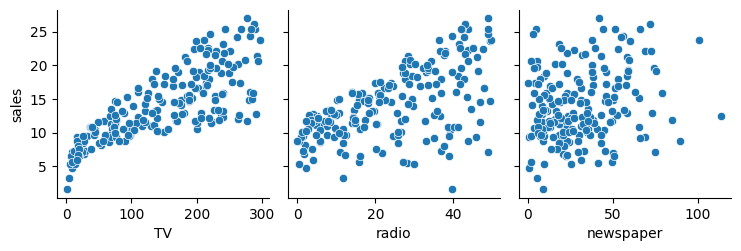

In [8]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', kind='scatter')
plt.show()


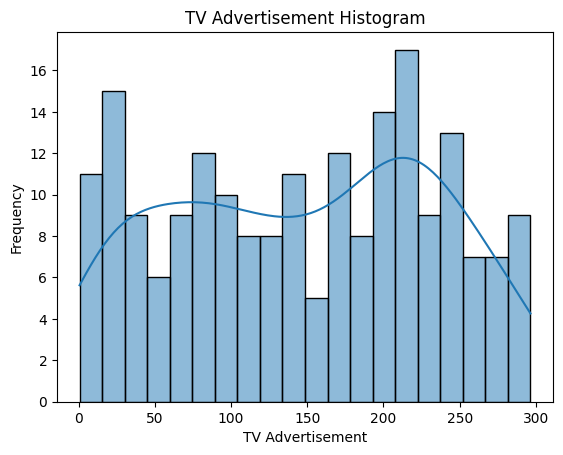

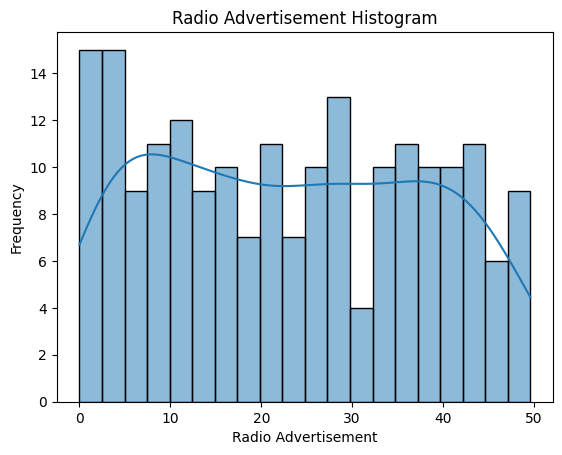

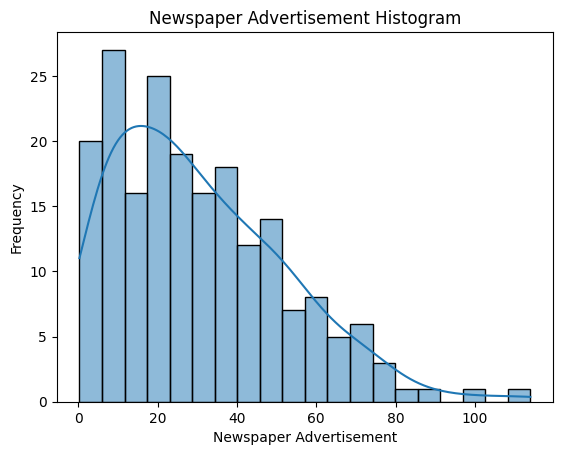

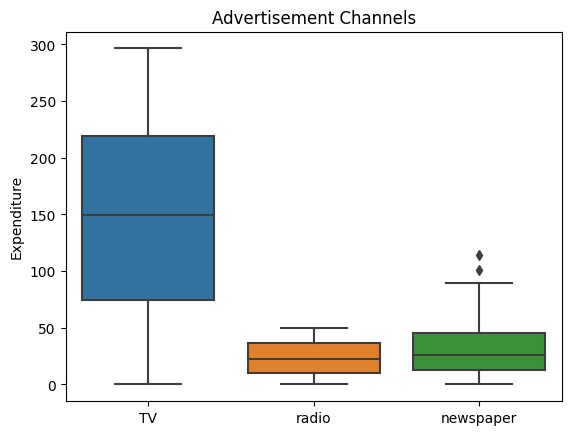

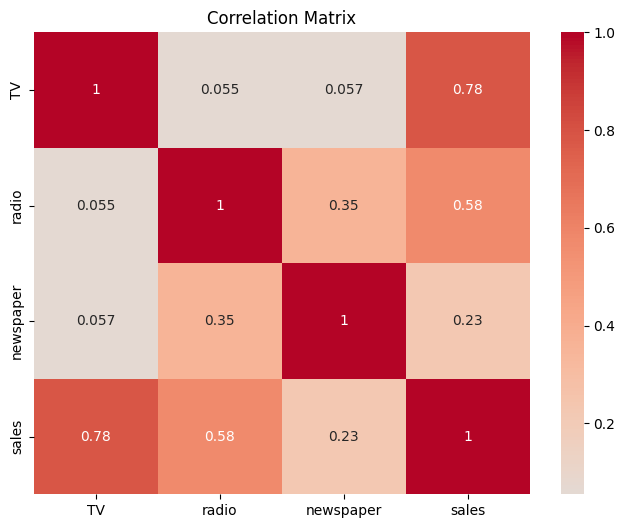

In [9]:
# Histograms
sns.histplot(data=data, x='TV', bins=20, kde=True)
plt.title('TV Advertisement Histogram')
plt.xlabel('TV Advertisement')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=data, x='radio', bins=20, kde=True)
plt.title('Radio Advertisement Histogram')
plt.xlabel('Radio Advertisement')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=data, x='newspaper', bins=20, kde=True)
plt.title('Newspaper Advertisement Histogram')
plt.xlabel('Newspaper Advertisement')
plt.ylabel('Frequency')
plt.show()

# Box plots
sns.boxplot(data=data[['TV', 'radio', 'newspaper']])
plt.title('Advertisement Channels')
plt.ylabel('Expenditure')
plt.show()

# Correlation matrix
correlation_matrix = data[['TV', 'radio', 'newspaper', 'sales']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [12]:
null_counts = data.isnull().sum()
data_cleaned = data.dropna()
null_counts


TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [14]:
X = data_cleaned[['TV', 'radio', 'newspaper']]
y = data_cleaned['sales']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [18]:
y_pred = model.predict(X_test_scaled)


In [22]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE", mse)
print("R2", r2)

MSE 3.174097353976106
R2 0.8994380241009119


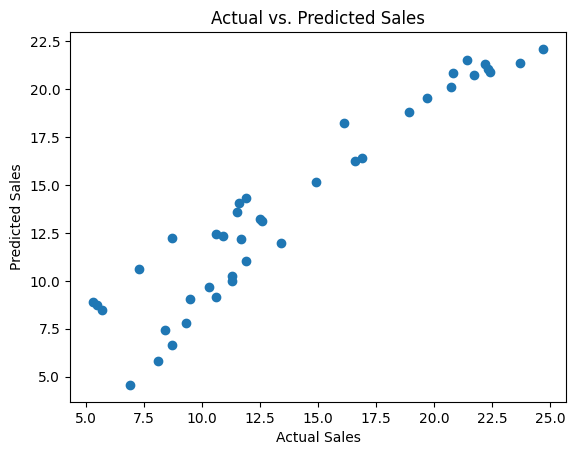

In [23]:

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()


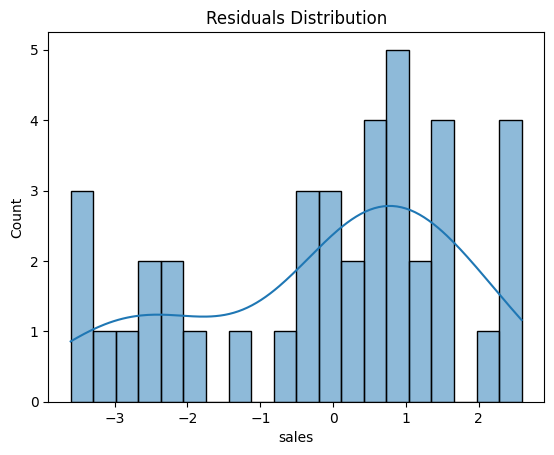

In [24]:
residuals = y_test - y_pred
sns.histplot(residuals, bins=20, kde=True)
plt.title('Residuals Distribution')
plt.show()


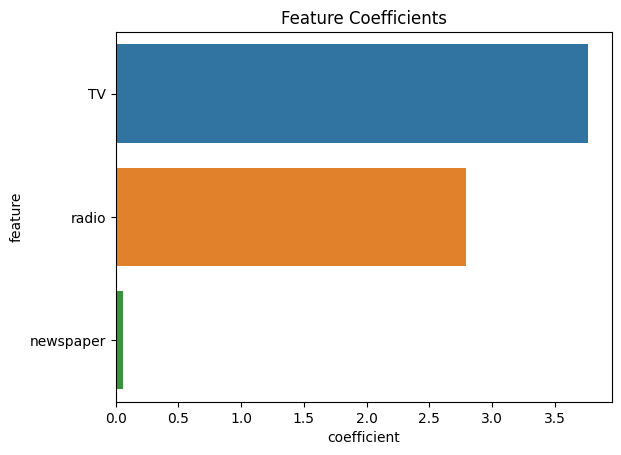

In [25]:
coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
sns.barplot(x='coefficient', y='feature', data=coef_df)
plt.title('Feature Coefficients')
plt.show()
